In [52]:
from google.oauth2 import service_account
import pandas as pd
import gspread
import json
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [53]:
#Import the json data
load_dotenv()
google_json = os.getenv('GOOGLE_JSON')

In [54]:
service_account_info = json.loads(google_json)
credentials = service_account.Credentials.from_service_account_info(service_account_info)

In [55]:
scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive']
creds_with_scope = credentials.with_scopes(scope)

In [56]:
client = gspread.authorize(creds_with_scope)

In [57]:
spreadsheet = client.open_by_url(os.getenv('GOOGLE_SHEET'))

In [58]:
worksheet = spreadsheet.get_worksheet(0)

In [59]:
records_data = worksheet.get_all_records()

In [60]:
records_df = pd.DataFrame.from_dict(records_data)

In [61]:
records_df['K/D Ratio'] = round(records_df.Kills / records_df.Deaths, 1)
records_df

,Date time,Kills,Deaths,Accuracy,Shots Fired,Shots Hit,Damage Dealt,Damage Taken,Notes,K/D Ratio
0,23/02/2024 15:40,26,10,49.65,441,219,9206,5252,,2.6
1,23/02/2024 16:17,23,11,48.80,420,205,8463,4917,,2.1
2,23/02/2024 16:35,22,14,45.33,450,204,7646,5493,,1.6
3,23/02/2024 16:50,25,15,42.60,399,170,7566,5231,,1.7
4,23/02/2024 17:13,28,14,44.26,436,193,8615,5941,,2.0
5,23/02/2024 23:17,66,20,43.10,740,319,15396,8348,Changed to HCS:FFA,3.3
6,24/02/2024 18:09,61,25,42.73,681,291,13331,9140,First match of the day,2.4
7,24/02/2024 18:26,71,18,42.30,773,327,15292,8232,,3.9
8,24/02/2024 20:38,77,14,45.66,830,379,16861,7697,,5.5


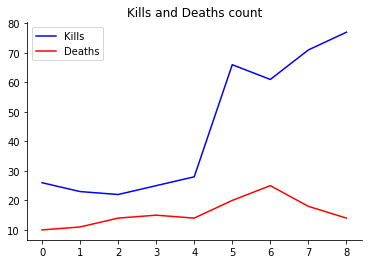

In [62]:
sns.lineplot(data=records_df, x=records_df.index, y='Kills', color='blue')
sns.lineplot(data=records_df, x=records_df.index, y='Deaths', color='red')
sns.despine(left=False, bottom=False)
plt.title('Kills and Deaths count')
plt.ylabel('')
plt.legend(['Kills', 'Deaths'])

In [63]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=records_df['Date time'], y=records_df['Kills'], mode='lines+markers', name='Kills', line=dict(color='#FF2A6D')))
fig.add_trace(go.Scatter(x=records_df['Date time'], y=records_df['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='#05D9E8')))
fig.update_layout(title='Last Games', hovermode='x', plot_bgcolor='#01012B')

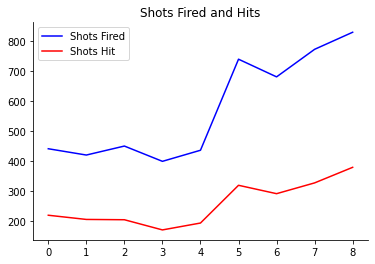

In [64]:
sns.lineplot(data=records_df, x=records_df.index, y='Shots Fired', color='blue')
sns.lineplot(data=records_df, x=records_df.index, y='Shots Hit', color='red')
sns.despine(left=False, bottom=False)
plt.title('Shots Fired and Hits')
plt.ylabel('')
plt.legend(['Shots Fired', 'Shots Hit'])

In [65]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=records_df['Date time'], y=records_df['Shots Fired'], mode='lines+markers', name='Shots Fired', line=dict(color='#FF2A6D')))
fig.add_trace(go.Scatter(x=records_df['Date time'], y=records_df['Shots Hit'], mode='lines+markers', name='Shots Hit', line=dict(color='#05D9E8')))
fig.update_layout(title='Shooting', hovermode='x', plot_bgcolor='#01012B')

Text(0, 0.5, '')

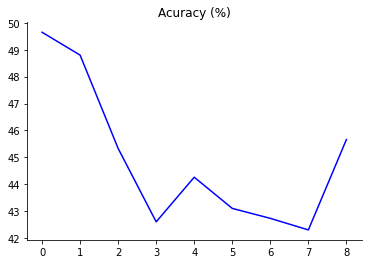

In [66]:
sns.lineplot(data=records_df, x=records_df.index, y='Accuracy', color='blue')
sns.despine(left=False, bottom=False)
plt.title('Acuracy (%)')
plt.ylabel('')

In [67]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=records_df['Date time'], y=records_df['Accuracy'], mode='lines+markers', name='Accuracy', line=dict(color='#FF2A6D')))
fig.update_layout(title='Accuracy (%)', hovermode='x', plot_bgcolor='#01012B')

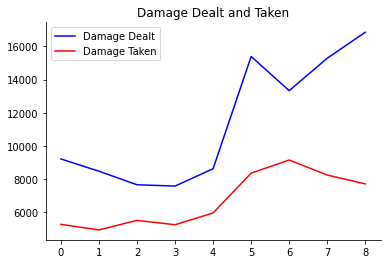

In [68]:
sns.lineplot(data=records_df, x=records_df.index, y='Damage Dealt', color='blue')
sns.lineplot(data=records_df, x=records_df.index, y='Damage Taken', color='red')
sns.despine(left=False, bottom=False)
plt.title('Damage Dealt and Taken')
plt.ylabel('')
plt.legend(['Damage Dealt', 'Damage Taken'])

In [69]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=records_df['Date time'], y=records_df['Damage Dealt'], mode='lines+markers', name='Damage Dealt', line=dict(color='#FF2A6D')))
fig.add_trace(go.Scatter(x=records_df['Date time'], y=records_df['Damage Taken'], mode='lines+markers', name='Damage Taken', line=dict(color='#05D9E8')))
fig.update_layout(title='Damage', hovermode='x', plot_bgcolor='#01012B')

Text(0, 0.5, '')

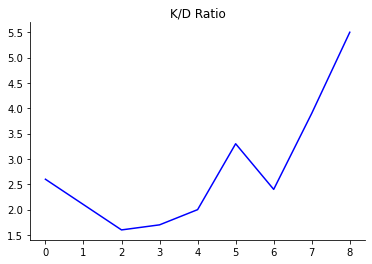

In [70]:
sns.lineplot(data=records_df, x=records_df.index, y='K/D Ratio', color='blue')
sns.despine(left=False, bottom=False)
plt.title('K/D Ratio')
plt.ylabel('')

In [71]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=records_df['Date time'], y=records_df['K/D Ratio'], mode='lines+markers', name='K/D Ratio', line=dict(color='#FF2A6D')))
fig.update_layout(title='K/D Ratio', hovermode='x', plot_bgcolor='#01012B')